In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv(r'C:\Users\DK\Desktop\tamilboomi\machine learning\logistic\train.csv')
test_df = pd.read_csv(r'C:\Users\DK\Desktop\tamilboomi\machine learning\logistic\test.csv')

In [3]:
Y_train = train_df['Survived']
Y_test_PassengerId = test_df['PassengerId'] # Save for submission

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_df = train_df[features] 
test_df = test_df[features] 

In [4]:
train_df.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [5]:
combined = [train_df, test_df] 

for df in combined:     
    # Filling missing values. 
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Fare'].fillna(df['Fare'].mean(),inplace=True)
    df['Embarked'].fillna(value='S',inplace=True)    
    
    # Converting categorical features to numeric
    df['Sex'] = df['Sex'].replace(['female','male'],[0,1]).astype(int)
    df['Embarked'] = df['Embarked'].replace(['S','Q','C'],[1,2,3]).astype(int)
    
    # Another way to convert categorical features to numeric
    #df['Sex'] = df['Sex'].map({'male': 0, 'female': 1 }).astype(int)    
    #df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)     
      
    # Perform normalization
    df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
    df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
    df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
    df.loc[(df['Fare'] > 31) & (df['Fare'] <= 99), 'Fare']   = 3
    df.loc[(df['Fare'] > 99) & (df['Fare'] <= 250), 'Fare']   = 4
    df.loc[ df['Fare'] > 250, 'Fare'] = 5
    df['Fare'] = df['Fare'].astype(int)

    
# Make sure that train data does not contain NaN
assert not train_df.isnull().values.any()

# Make sure that test data does not contain NaN
assert not test_df.isnull().values.any()

# Otherwise find columns with NaN value and deal with it: df.columns[df.isnull().any()].tolist())

In [6]:
train_df.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,0,1
1,1,0,38.0,1,0,3,3
2,3,0,26.0,0,0,1,1
3,1,0,35.0,1,0,3,1
4,3,1,35.0,0,0,1,1


In [8]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    s = 1 / (1 + np.exp(-z))
    
    return s


In [9]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    w = np.zeros(shape=(dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [10]:
def propagate(w, b, X, Y):
    """
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b    
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X) + b)                                                   # compute activation
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))          # compute cost
        
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1 / m) * np.dot(X,(A - Y).T)
    db = (1 / m) * np.sum(A - Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost


In [11]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        grads, cost = propagate(w, b, X, Y)
                
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        w = w - learning_rate * dw 
        b = b - learning_rate * db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs


In [12]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture   
    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        Y_prediction[0, i] = 1 if A[0, i] >= 0.5 else 0
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction


In [13]:
def model(X_train, Y_train, X_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_of_features, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """   
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost=False)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_train = predict(w, b, X_train)    
    Y_prediction_test = predict(w, b, X_test)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))

    
    d = {"costs": costs,         
         "Y_prediction_train" : Y_prediction_train, 
         "Y_prediction_test": Y_prediction_test,
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d


In [14]:
X_train = np.array(train_df).T
Y_train = np.array(Y_train)
Y_train = Y_train.reshape(Y_train.shape[0], 1).T
X_test = np.array(test_df).T

assert X_train.shape[1] == Y_train.shape[1]
assert X_train.shape[0] == X_test.shape[0]
X_train.shape, Y_train.shape, X_test.shape

((7, 891), (1, 891), (7, 418))

In [15]:
d = model(X_train, Y_train, X_test, num_iterations = 50000, learning_rate = 0.0001, print_cost = True)


train accuracy: 72.39057239057239 %


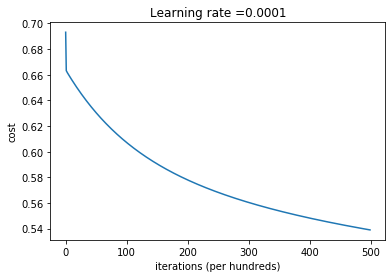

In [16]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()